In [19]:
import json
import csv
import tweepy
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
    
#my authentication credentials
global consumer_key
global consumer_secret
global access_token
global access_token_secret

consumer_key = "Bowd57B61sUkyBpAFKFe7OgYR"
consumer_secret = "MYmkXoIBB1pmtMnU3DYFSvO92GmaQloY3oCPGvHJE1dEHfjKHR"
access_token = "788045181237006337-G16TSuJghyazcS551s7tRjyZTGAu6py"
access_token_secret = "QXxeSAzYnccTDxMy7EMHz5BXFwvLjcicY7XSD1lw8xDvb"

#create authentication for accessing Twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
    
#initialize Tweepy API
api = tweepy.API(auth)

In [3]:
def get_tweets(username):
    
    #create authentication for accessing Twitter
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    
    #initialize Tweepy API
    api = tweepy.API(auth)
    # Empty Array 
    alltweets = []
    
    newtweets = api.user_timeline(screen_name = username,count=200)
    
    #save most recent tweets
    alltweets.extend(newtweets)
    
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1

    #keep grabbing tweets until there are no tweets left to grab
    while len(newtweets) > 0:
        
        #all subsiquent requests use the max_id param to prevent duplicates
        newtweets = api.user_timeline(screen_name = username,count=200,max_id=oldest)
        
        #save most recent tweets
        alltweets.extend(newtweets)

        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        

  
    return alltweets

In [4]:
#Attains tweets from the two main accounts in question
JB_tweets = get_tweets("jairbolsonaro")
LL_tweets = get_tweets("LulaOficial")


#print(len(LL_tweets))
#print(LL_tweets[0].created_at)
#print(LL_tweets[len(LL_tweets)-1].created_at)
#print(len(JB_tweets))
#print(JB_tweets[0].created_at)
#print(JB_tweets[len(JB_tweets)-1].created_at)

In [5]:
JBtweet_json = []
LLtweet_json = []
for tweet in JB_tweets:
    JBtweet_json.append(tweet._json)
    
for tweet in LL_tweets:
    LLtweet_json.append(tweet._json)

In [6]:
with open('JBjson.txt', 'w') as outfile:
    json.dump(JBtweet_json, outfile)

In [7]:
with open('LLjson.txt', 'w') as outfile:
    json.dump(LLtweet_json, outfile)

In [45]:
df = pd.DataFrame.from_dict(JBtweet_json)
print(len(df))
df[df['retweeted_status'].notnull()]
print(len(df[df['retweeted_status'].null()]))

55672


AttributeError: 'Series' object has no attribute 'null'

    In this section I will be collecting the user timelines (maximum of 3500 tweets per user) for 
    significant Brazilian politicians. The distinction among the politicians is their political ideologies and 
    affiliated parties. 

In [11]:
rightist_pols = ["GeneralMourao", "FlavioBolsonaro", "TerezaCrisMS", "onyxlorenzoni", 
                "PauloGuedesMin", "AbrahamWeint", "soudaniella111", "majorolimpio", "SorayaThronicke"]

leftist_pols = ["senadorhumberto", "elizianegama", "senadorjpprates", "dilmabr", "senadorpaulor", 
                "jaqueswagner", "paulopaim", "gleisi", "FlavioDino"]

#"jairbolsonaro", and "LulaOficial" were left out because their tweets have already been gathered

In [23]:
for screen_name in rightist_pols:
    
    user_timeline = get_tweets(screen_name)
    usertweets_json = []
    
    for tweet in user_timeline:
        usertweets_json.append(tweet._json)
    
    with open(screen_name + 'json.txt', 'w') as outfile:
        json.dump(usertweets_json, outfile)

In [38]:
for screen_name in leftist_pols:
    
    user_timeline = get_tweets(screen_name)
    usertweets_json = []
    
    for tweet in user_timeline:
        usertweets_json.append(tweet._json)
    
    with open(screen_name + 'json.txt', 'w') as outfile:
        json.dump(usertweets_json, outfile)

### Data mining

In [42]:
#all_retweeters = []


for ll_tweet in LL_tweets:
    
    new_retweeters = []
    new_retweeters = api.retweeters(ll_tweet.id, count=2)

    while (1):
        try:
        
            for user_id in new_retweeters:
                retweeter = api.get_user(user_id)
                is_protected = retweeter.protected
                # user must be public
                if is_protected == True:
                    continue
        
                # user must have atleast 20 followers
                if retweeter.followers_count < 20:
                    continue
            
                # user must have atleast 500 tweets and retweets
                if retweeter.statuses_count < 500:
                    continue
            
                # bot check 1: user must have a follower to following ratio of 1 to 50
                if ((retweeter.friends_count / retweeter.followers_count) > 50):
                    continue
    
                # user must be unique
                if retweeter.id_str not in all_userids:        
                    all_retweeters.append(retweeter)
        
        
        except tweepy.TweepError as e:
            # Just exit if any error
            print("some error : " + str(e))
            if len(all_retweeters)>=15922:
                break
            time.sleep(16*60)
        

some error : [{'message': 'Rate limit exceeded', 'code': 88}]
some error : [{'message': 'Rate limit exceeded', 'code': 88}]
some error : [{'message': 'Rate limit exceeded', 'code': 88}]
some error : [{'message': 'Rate limit exceeded', 'code': 88}]
some error : [{'message': 'Rate limit exceeded', 'code': 88}]
some error : [{'message': 'Rate limit exceeded', 'code': 88}]
some error : [{'message': 'Rate limit exceeded', 'code': 88}]
some error : [{'message': 'Rate limit exceeded', 'code': 88}]
some error : [{'message': 'Rate limit exceeded', 'code': 88}]
some error : [{'message': 'Rate limit exceeded', 'code': 88}]
some error : [{'message': 'Rate limit exceeded', 'code': 88}]
some error : [{'message': 'Rate limit exceeded', 'code': 88}]
some error : [{'message': 'Rate limit exceeded', 'code': 88}]
some error : [{'message': 'Rate limit exceeded', 'code': 88}]


KeyboardInterrupt: 

In [43]:
print(len(all_retweeters))

16203


In [44]:
# users that retweeted Bolsonaro's tweets
all_retweeters_json = []

for user in all_retweeters:
    all_retweeters_json.append(user._json)
        
with open('LLrtusers.txt', 'w') as outfile:
    json.dump(all_retweeters_json, outfile)


#new_tweets = get_tweets(retweeter.screen_name)
                    total_tweets = len(new_tweets)
                    total_rts = 0
                    for tweet in new_tweets:
                        if (hasattr(tweet, 'retweeted_status') == True):
                            total_rts += 1
            
                    #bot check 2: user must have a original tweet to retweet ratio of 1 to 9
                    if ((total_rts/total_tweets) > .9):
                        continue

In [31]:
#new_tweets = get_tweets(retweeter.screen_name)
total_tweets = len(new_tweets)
total_rts = 0
for tweet in new_tweets:
    if (hasattr(tweet, 'retweeted_status')==True):
        total_rts += 1
print(total_tweets)
print(total_rts)

3190
892


In [30]:
print(hasattr(new_tweets[2], 'retweeted_status'))
len(new_tweets)

True


3190

### Miscellaneous Stats

In [8]:
## storing retweet counts for each of the Presidents' 3200 past tweets
JB_rts = []
JB_likes = []
JB_dates = []
#JB_tweets = []

LL_rts = []
LL_likes = []
LL_dates = []
#LL_tweets = []

for tweet in JB_tweets:
    JB_rts.append(tweet.retweet_count)
    JB_likes.append(tweet.favorite_count)
    JB_dates.append(tweet.created_at)
    #JB_tweets.append(tweet.text)
    
for tweet in LL_tweets:
    LL_rts.append(tweet.retweet_count)
    LL_likes.append(tweet.favorite_count)
    LL_dates.append(tweet.created_at)
    #LL_tweets.append(tweet.text)
    

In [9]:
print(JB_tweets[150].text)

- Quanto mais focarem em intriga e poder, menos informadas ficarão as pessoas e mais pânico será alimentado. É prec… https://t.co/ttogao0IQl


In [10]:
print(max(JB_likes))

163850


In [11]:
print(JB_tweets[3089].text)

Boletim Médico de 05/02/2019, explanado pelo porta-voz da Presidência da República, General Rêgo Barros. https://t.co/9QTEiZtNPP


In [12]:
print(max(LL_likes))

345530


In [13]:
print(max(LL_rts))
print(max(JB_rts))

80011
34220


In [14]:
print(LL_tweets[473].text)

Por que a Globo não pede uma entrevista comigo ao vivo? Eu estou disposto a debater com quem quer que seja.


In [15]:
print(np.around(np.mean(JB_rts)))
print(np.around(np.mean(JB_likes)))
print(np.around(np.mean(LL_rts)))
print(np.around(np.mean(LL_likes)))

print(np.around(np.std(JB_rts)))
print(np.around(np.std(JB_likes)))
print(np.around(np.std(LL_rts)))
print(np.around(np.std(LL_likes)))

4666.0
28418.0
1131.0
4038.0
3422.0
22612.0
2866.0
12671.0


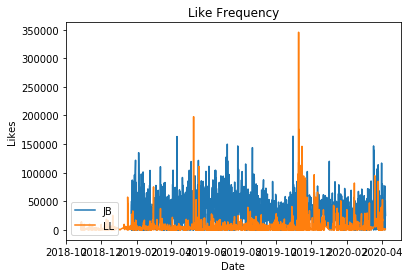

In [16]:
## visualizing number of likes
plt.plot(JB_dates, JB_likes, label= "JB")
plt.plot(LL_dates, LL_likes, label="LL")
plt.legend(loc='lower left')
plt.title("Like Frequency")
plt.xlabel("Date")
plt.ylabel("Likes")
plt.show()

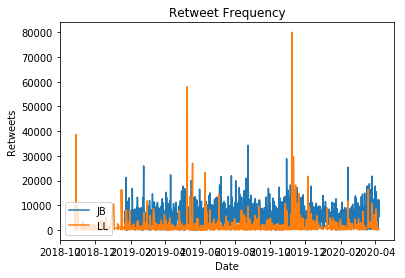

In [17]:
## visualizing number of likes
plt.plot(JB_dates, JB_rts, label= "JB")
plt.plot(LL_dates, LL_rts, label="LL")
plt.legend(loc='lower left')
plt.title("Retweet Frequency")
plt.xlabel("Date")
plt.ylabel("Retweets")
plt.show()

In [34]:
#oldJB_tweets = pd.read_csv("JB_tweets.csv")

In [35]:
#oldLL_tweets = pd.read_csv("LL_tweets.csv")

In [44]:
#oldJB_tweets = oldJB_tweets.values.tolist()
#oldLL_tweets = oldLL_tweets.values.tolist()

In [91]:
JB_texts = []
for tweet in JB_tweets:
    JB_texts.append(tweet.text)
    
LL_texts = []  
for tweet in LL_tweets:
    LL_texts.append(tweet.text)

In [84]:
print(JB_texts[3089])

Recebemos há pouco ligação do Presidente dos EUA, @realDonaldTrump nos parabenizando por esta eleição histórica! Ma… https://t.co/ah3JxYbWdp


In [92]:
with open('JB_texts2.txt', 'w') as f:
    for item in JB_texts:
        f.write("%s\n" % item)
        
with open('LL_texts2.txt', 'w') as f:
    for item in LL_texts:
        f.write("%s\n" % item)

# Wordnet Code

In [44]:
import nltk
import emoji
import string
from nltk import FreqDist
from nltk.corpus import stopwords

In [25]:
text = ' '.join(list(df['text']))

In [26]:
jb_tokens = nltk.tokenize.word_tokenize(text.lower())
jb_dist = FreqDist(jb_tokens)

In [61]:
jb_dist.most_common(1000)

[(':', 3396),
 ('https', 2607),
 (',', 2607),
 ('de', 2339),
 ('.', 1622),
 ('o', 1573),
 ('a', 1490),
 ('@', 1328),
 ('-', 1246),
 ('e', 1085),
 ('do', 1083),
 ('da', 787),
 ('que', 700),
 ('em', 691),
 ('para', 625),
 ('!', 542),
 ('no', 539),
 ('com', 532),
 ('brasil', 376),
 ('mais', 357),
 ('na', 347),
 ('rt', 318),
 ('os', 292),
 ('um', 285),
 ('governo', 267),
 ('ao', 254),
 ('é', 253),
 ('dos', 240),
 ('(', 239),
 (')', 223),
 ('uma', 212),
 ('não', 210),
 ('por', 180),
 ('as', 180),
 ('$', 157),
 ('presidente', 156),
 ('pelo', 154),
 ('hoje', 152),
 ('todos', 148),
 ('r', 140),
 ('à', 134),
 ('das', 131),
 ('se', 128),
 ('pela', 128),
 ('como', 128),
 ('nosso', 126),
 ('bolsonaro', 125),
 ('sobre', 123),
 ('%', 120),
 ('👍', 111),
 ('ministro', 111),
 ('dia', 104),
 ('``', 103),
 ('são', 102),
 ('nos', 93),
 ("''", 85),
 ('nossa', 84),
 ('semana', 83),
 ('🇧🇷', 79),
 ('foi', 78),
 ('obrigado', 76),
 ('já', 75),
 ('programa', 74),
 ('está', 74),
 ('entre', 73),
 ('nas', 73),
 ('m

In [67]:
## this code improves the wordnets that will be created afterwards
stop_words = set(stopwords.words('portuguese')) 

jb_filtered = [w for w in jb_tokens if not w in stop_words] 
  
jb_filtered = []
  
for w in jb_tokens: 
    if w not in stop_words: 
        jb_filtered.append(w)
        

#remove punctuation marks
i = 0 
punct =[]
punct += list(string.punctuation)


for w in jb_filtered:
    #remove the emoji
    for char in w:
        if char in emoji.UNICODE_EMOJI:
            w = w.encode('ascii', 'ignore').decode('ascii')
    for punctuation in punct:
        w = w.replace(punctuation, '')
    jb_filtered[i] = w
    i = i+1
    
print(punct)
jb_filtered_dist = FreqDist(jb_filtered)
jb_filtered_dist.most_common(1000)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


[('', 12384),
 ('https', 2607),
 ('brasil', 377),
 ('rt', 318),
 ('governo', 269),
 ('presidente', 156),
 ('hoje', 152),
 ('todos', 148),
 ('r', 140),
 ('bolsonaro', 126),
 ('sobre', 123),
 ('ministro', 111),
 ('dia', 104),
 ('semana', 83),
 ('2019', 83),
 ('…', 77),
 ('programa', 77),
 ('obrigado', 76),
 ('milhões', 72),
 ('grande', 72),
 ('abraço', 71),
 ('federal', 70),
 ('tarcisiogdf', 69),
 ('mil', 66),
 ('boa', 65),
 ('nacional', 65),
 ('paulo', 64),
 ('país', 64),
 ('anos', 64),
 ('jair', 63),
 ('trabalho', 62),
 ('ano', 62),
 ('após', 61),
 ('nova', 60),
 ('bilhões', 59),
 ('1', 58),
 ('economia', 58),
 ('via', 55),
 ('sfmoro', 55),
 ('jairbolsonaro', 54),
 ('bom', 53),
 ('2', 53),
 ('live', 52),
 ('e…', 51),
 ('maior', 50),
 ('ser', 49),
 ('empregos', 49),
 ('5', 47),
 ('forte', 47),
 ('recursos', 46),
 ('de…', 46),
 ('d…', 46),
 ('todo', 45),
 ('combate', 45),
 ('agora', 44),
 ('carlosbolsonaro', 44),
 ('ministério', 44),
 ('estados', 43),
 ('ações', 43),
 ('obras', 43),
 ('l

In [89]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
jb_finder = nltk.BigramCollocationFinder.from_words(jb_tokens)
jb_scores = jb_finder.score_ngrams(bigram_measures.raw_freq)

In [90]:
print(jb_scores)

[(('https', ':'), 0.03872794531808978), (('rt', '@'), 0.006134969325153374), (('.', 'https'), 0.003090319535995372), (('.', '-'), 0.0022834873418685017), ((',', 'o'), 0.0021008083545190214), (('com', 'o'), 0.0020399153587358615), (('!', 'https'), 0.0018115666245490112), (('o', 'brasil'), 0.0017658968777116413), (('r', '$'), 0.0017506736287658511), (('a', 'todos'), 0.0016593341350911112), ((':', 'https'), 0.0015984411393079512), (('o', '@'), 0.001567994641416371), ((',', 'que'), 0.0012939761603921508), (('.', 'o'), 0.0012939761603921508), (('do', 'brasil'), 0.001187413417771621), (('para', 'o'), 0.0011721901688258307), (('.', 'a'), 0.0011417436709342508), ((',', 'a'), 0.0010656274262053006), (('com', 'a'), 0.0010504041772595107), (('jair', 'bolsonaro'), 0.0010351809283137207), (('no', 'brasil'), 0.0010351809283137207), (('todos', '!'), 0.0010351809283137207), (('-', 'o'), 0.0010199576793679308), (('o', 'presidente'), 0.0009895111814763506), (('brasil', '.'), 0.0008829484388558207), (('d

In [68]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ruideoliveira/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ruideoliveira/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True